In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic


### Stage1) Explore Data

In [348]:
loan = pd.read_csv("loan.csv", sep=',')

In [349]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [350]:
loan.shape

(614, 13)

In [351]:
# summary of statistics
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [352]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [353]:
loan['Gender'].unique() # male, female, null
loan['Married'].unique() #yes, no, null
loan['Dependents'].unique() #0,1,2,3+, null
loan['Education'].unique() #'Graduate', 'Not Graduate'
loan['Self_Employed'].unique() # yes, no , null
loan[loan['LoanAmount'].isnull()] #loanamount is null and loan_status = 'y' exists
loan['Loan_Amount_Term'].unique() # 360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.
loan['Credit_History'].unique() # 1.,  0., nan 
loan['Property_Area'].unique() # 'Urban', 'Rural', 'Semiurban'
loan['Loan_Status'].unique() # 'Y', 'N'


array(['Y', 'N'], dtype=object)

In [354]:
# nan count each column
loan.isnull().sum().to_frame('nan_count') 

,nan_count
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [355]:
# nan ratio each column
pd.DataFrame(data=loan.isnull().sum()/len(loan),columns=['nan_ratio'])

,nan_ratio
Loan_ID,0.000000
Gender,0.021173
Married,0.004886
Dependents,0.024430
Education,0.000000
Self_Employed,0.052117
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.035831
Loan_Amount_Term,0.022801


In [356]:
# decide to manage null values

In [357]:
loan.groupby('Gender').count()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Female,112,111,109,112,104,112,112,109,109,101,112,112
Male,489,487,477,489,465,489,489,470,478,451,489,489


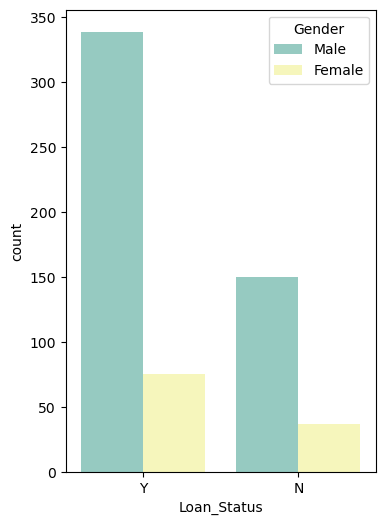

In [358]:
# count(loan_status) by gender
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Loan_Status',hue='Gender',data=loan,palette='Set3')
cnt.set_xlabel("Loan_Status")
cnt.set_ylabel("count")
plt.show()
# it looks like it doesn't matter which gender,
# and there are a lot more males than females,
# null values of gender can be all males!


In [359]:
# 'Gender' column (missing value imputation)
loan['Gender'] = loan['Gender'].fillna('Male')

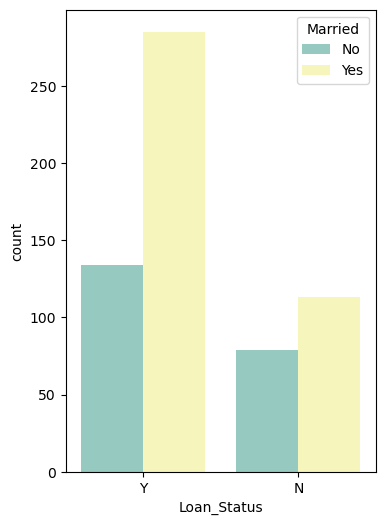

In [360]:
# count(loan_status) by Married
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Loan_Status',hue='Married',data=loan,palette='Set3')
cnt.set_xlabel("Loan_Status")
cnt.set_ylabel("count")
plt.show()
# The much more married, the more Loan_Status='Y'
# so, decide to replace null values of Married to 'Yes'
# ***** Married >> no Married (Loan_Status = 'Y')

In [361]:
loan['Married']= loan['Married'].fillna('Yes')

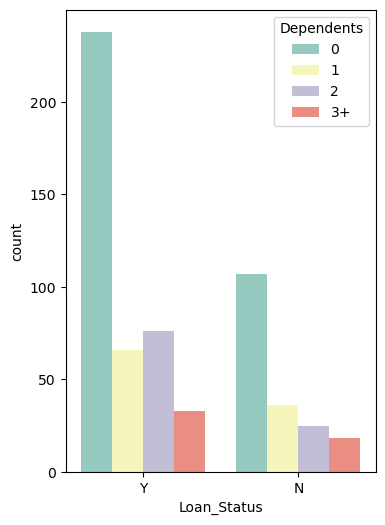

In [362]:
# count(loan_status) by Dependents
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Loan_Status',hue='Dependents',data=loan,palette='Set3')
cnt.set_xlabel("Loan_Status")
cnt.set_ylabel("count")
plt.show()
# The less Dependents, the more applicants for loan
# so, decide to replace null values of Dependents to 0

In [363]:
loan['Dependents']= loan['Dependents'].fillna('0')

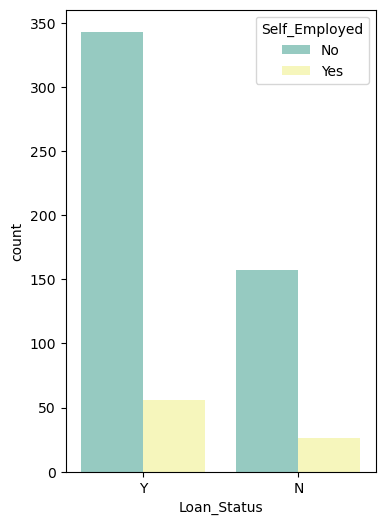

In [364]:
# count(loan_status) by Self_Employed 
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Loan_Status',hue='Self_Employed',data=loan,palette='Set3')
cnt.set_xlabel("Loan_Status")
cnt.set_ylabel("count")
plt.show()
# The less Self_Employed, the more applicants for loan
# so, decide to replace null values of Self_Employed to 'No'

In [365]:
loan['Self_Employed']= loan['Self_Employed'].fillna('No')

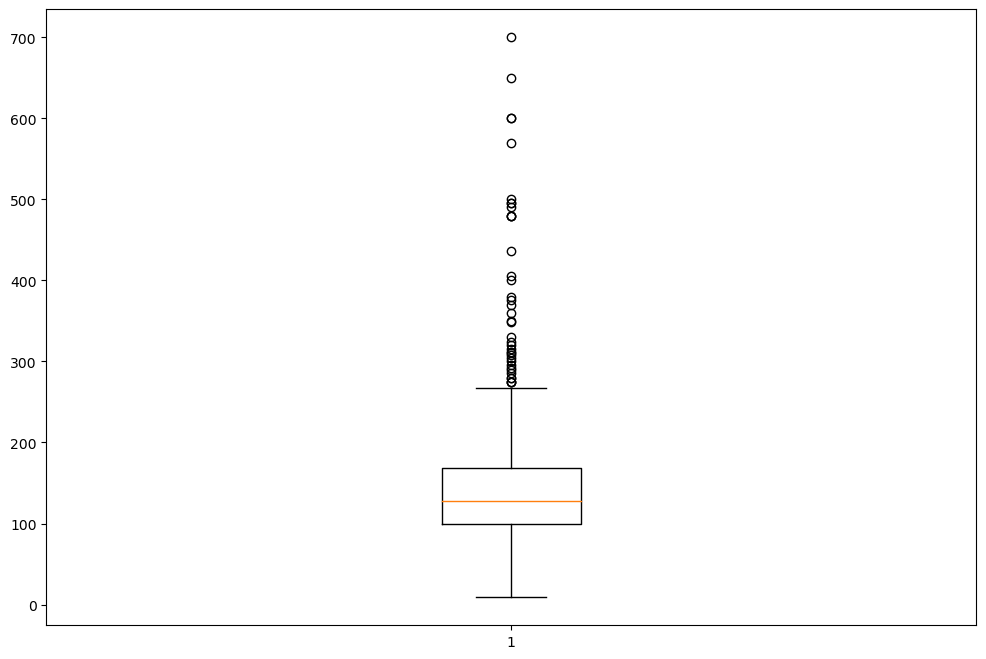

In [366]:
plt.boxplot(loan['LoanAmount'].dropna())

plt.show()
#plt.boxplot(loan['LoanAmount'].describe
#loan[loan['LoanAmount']>300].count()
# *** caculate outlier exactly and count except outliers
# decide to replace null values to mean 

In [369]:
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].mean())

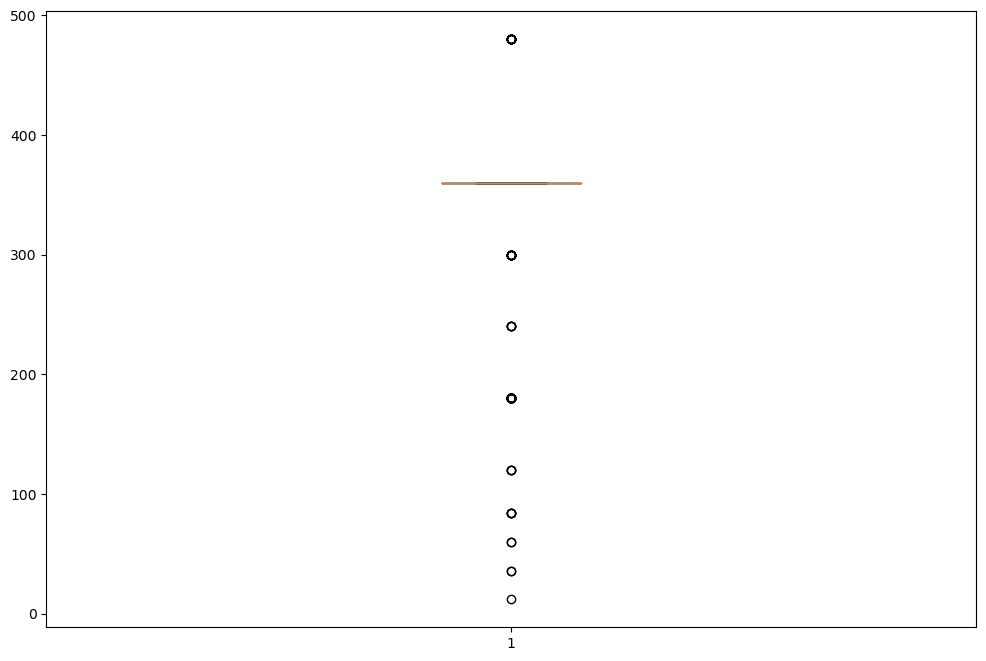

In [370]:
plt.boxplot(loan['Loan_Amount_Term'].dropna())

plt.show()

# decide to change type of Loan_Amount_Termn  (float -> str)

In [371]:
# Loan_Amount_Term column actually is not continuous variable, 
# so change the type to string (categorical variable)
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype(str)

<AxesSubplot:>

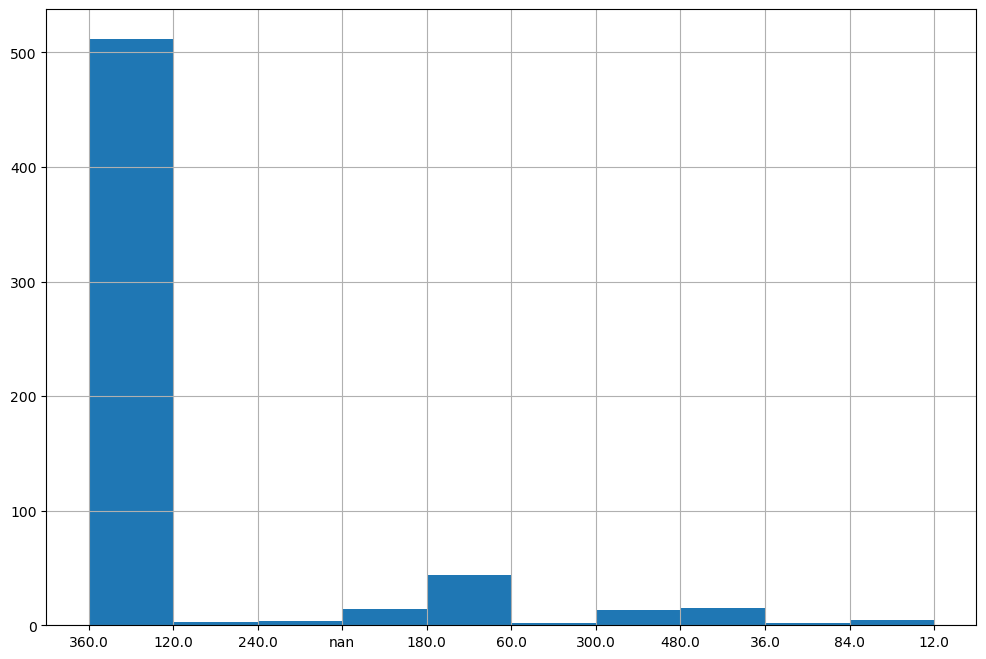

In [372]:
loan['Loan_Amount_Term'].hist()
# decide to change type of 'Loan_Amount_Term' to string (categorical variable) 
# *** interesting thing is 360 is the most term, Why???

In [373]:
loan.loc[loan['Loan_Amount_Term'] == 'nan', 'Loan_Amount_Term'] = '360.0'
# decide to replace 'Loan_Amount_Term' to '360'
# as 360 is the most in 'Loan_Amount_Term'

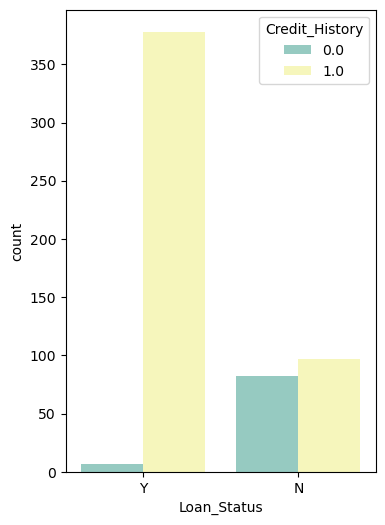

In [374]:
# count(loan_status) by Credit_History 
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Loan_Status',hue='Credit_History',data=loan,palette='Set3')
cnt.set_xlabel("Loan_Status")
cnt.set_ylabel("count")
plt.show()
# The more Credit_History, the better status which Loan_Status = 'Y'
# so, decide to replace null values of Credit_History to 'Y'

In [375]:
# Credit_History column actually is not continuous variable, 
# so change the type to string (categorical variable)
loan['Credit_History'] = loan['Credit_History'].astype(str)

In [376]:
loan.loc[loan['Credit_History']=='nan', 'Credit_History'] = '1.0'

<AxesSubplot:>

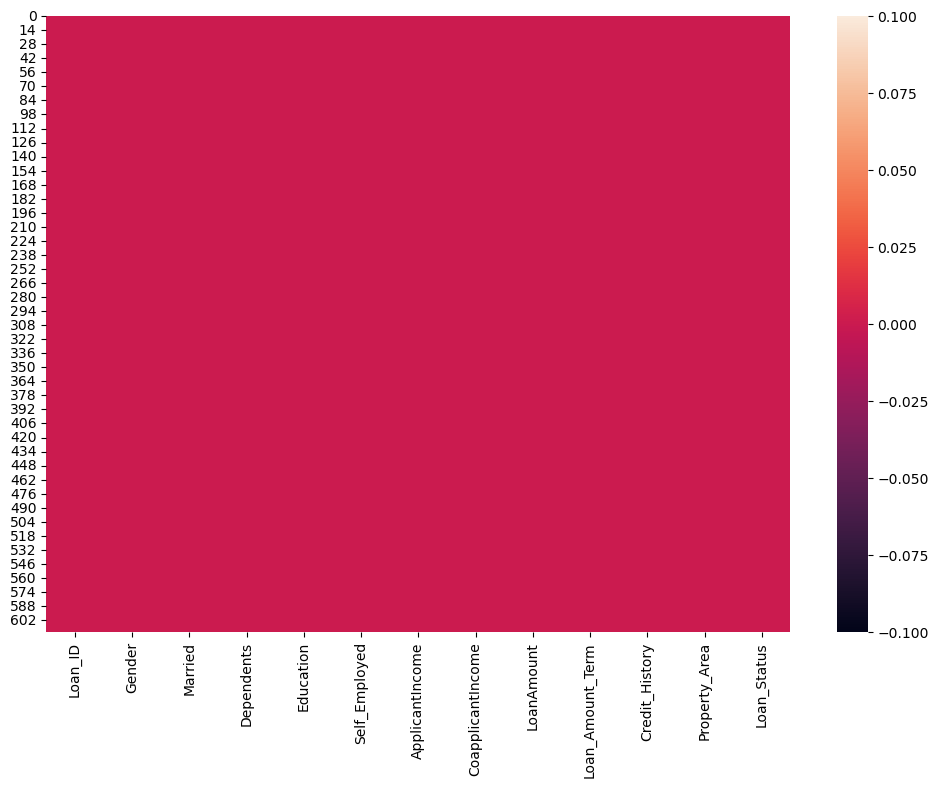

In [377]:
%matplotlib inline
sns.heatmap(loan.isnull(), cbar=True)
# all null values are removed!!!

In [378]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

### Stage2) Correlation Analysis
#### continuous vs continus

                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.116605    0.565620
CoapplicantIncome        -0.116605           1.000000    0.187828
LoanAmount                0.565620           0.187828    1.000000


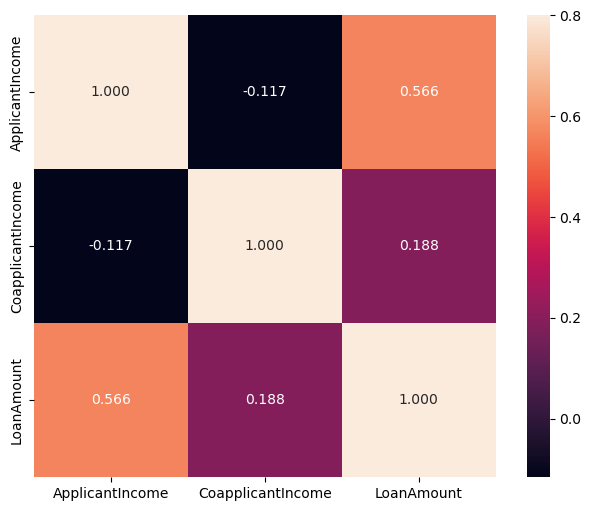

In [379]:
# define the function which draw heatmap for dataframe 

def draw_corrmat(df):
  y_corrmat = df.corr()
  f, ax = plt.subplots(figsize=(8,6))
  print(y_corrmat)
  sns.heatmap(y_corrmat, vmax=.8, annot=True, fmt='.3f', square=True);
  
draw_corrmat(loan)

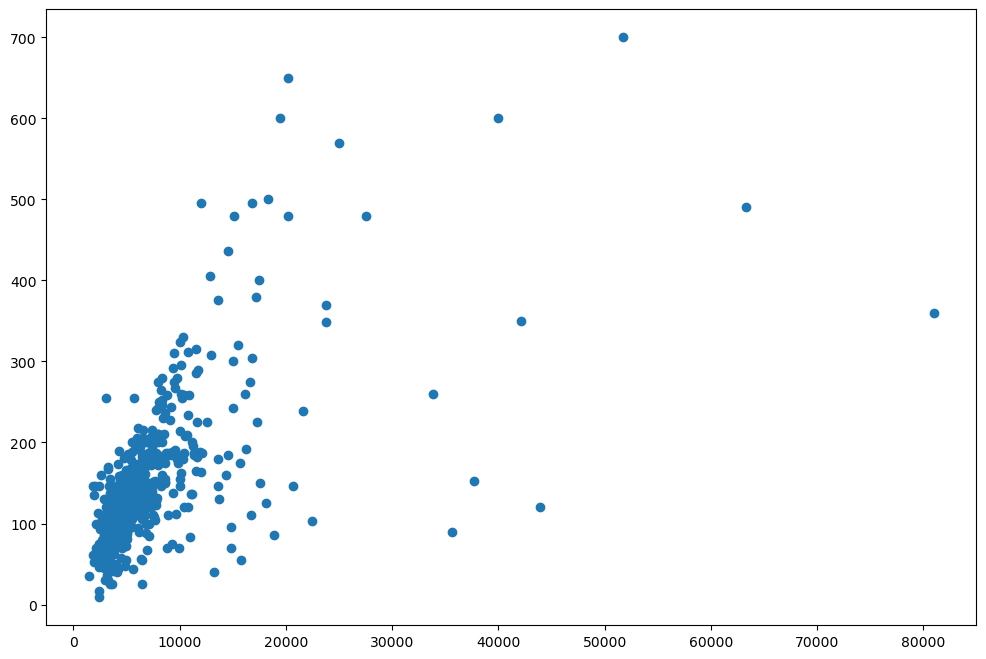

In [381]:
# create Derived Variables, 
# as ApplicantIncome and CoapplicantIncome have strong correlation with LoanAmount
# so that, assume that sum(ApplicantIncome,CoapplicantIncome) has 
# much more correlation with LoanAmount
loan['Income']=loan['ApplicantIncome']+loan['CoapplicantIncome']
plt.scatter(loan['Income'], loan['LoanAmount'])


In [382]:
# Commonsensically, the less ratio of Loan has, the better Loan_Status
# so that, create new derived variable Ratio_Loan
loan['Ratio_Loan'] = loan['LoanAmount']/loan['Income']

<AxesSubplot:title={'center':'Ratio_Loan'}, xlabel='[Loan_Status]'>

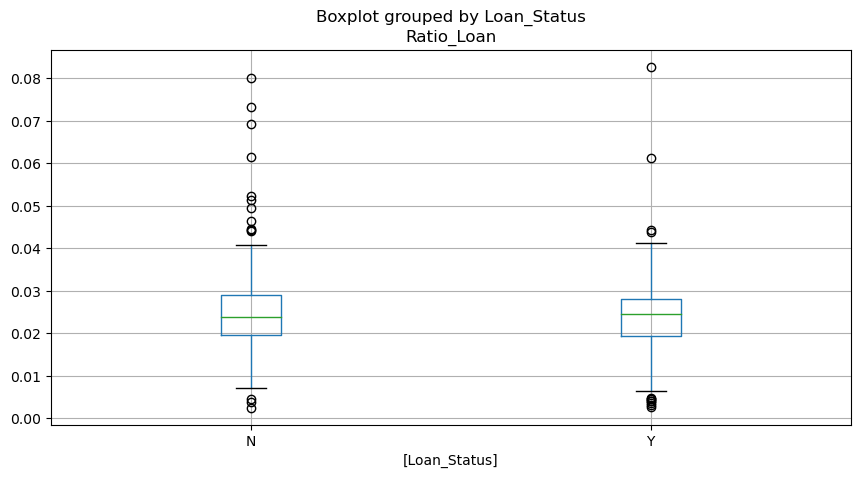

In [383]:
loan.boxplot(column=['Ratio_Loan'], by=['Loan_Status'],figsize=(10,5))
# no correlation between Ratio_Loan and Loan_Status

                   ApplicantIncome  CoapplicantIncome  LoanAmount    Income  \
ApplicantIncome           1.000000          -0.116605    0.565620  0.893037   
CoapplicantIncome        -0.116605           1.000000    0.187828  0.342781   
LoanAmount                0.565620           0.187828    1.000000  0.620102   
Income                    0.893037           0.342781    0.620102  1.000000   
Ratio_Loan               -0.312972          -0.199646    0.151715 -0.386484   

                   Ratio_Loan  
ApplicantIncome     -0.312972  
CoapplicantIncome   -0.199646  
LoanAmount           0.151715  
Income              -0.386484  
Ratio_Loan           1.000000  


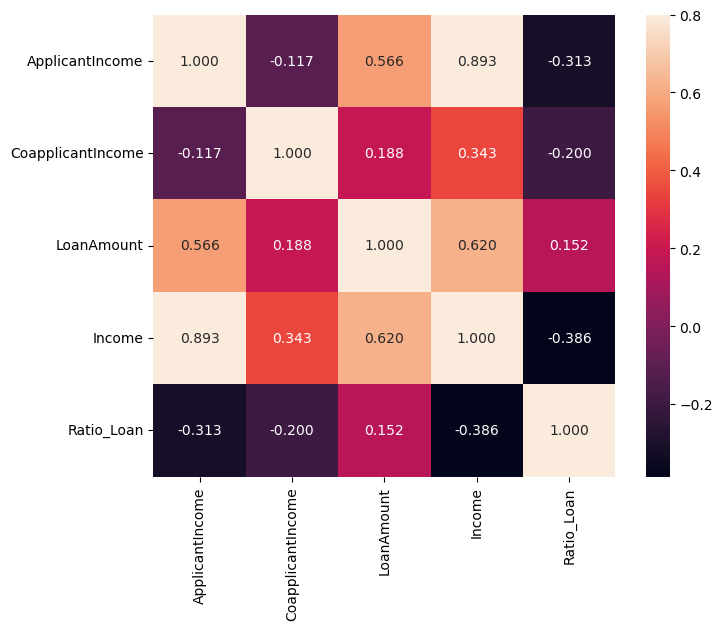

In [384]:
# heatmap including derived variables
  
draw_corrmat(loan)

# Loan_Amount and Income still have strong correlation!!!

In [385]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Income,Ratio_Loan
ApplicantIncome,1.000000,-0.116605,0.565620,0.893037,-0.312972
CoapplicantIncome,-0.116605,1.000000,0.187828,0.342781,-0.199646
LoanAmount,0.565620,0.187828,1.000000,0.620102,0.151715
Income,0.893037,0.342781,0.620102,1.000000,-0.386484
Ratio_Loan,-0.312972,-0.199646,0.151715,-0.386484,1.000000


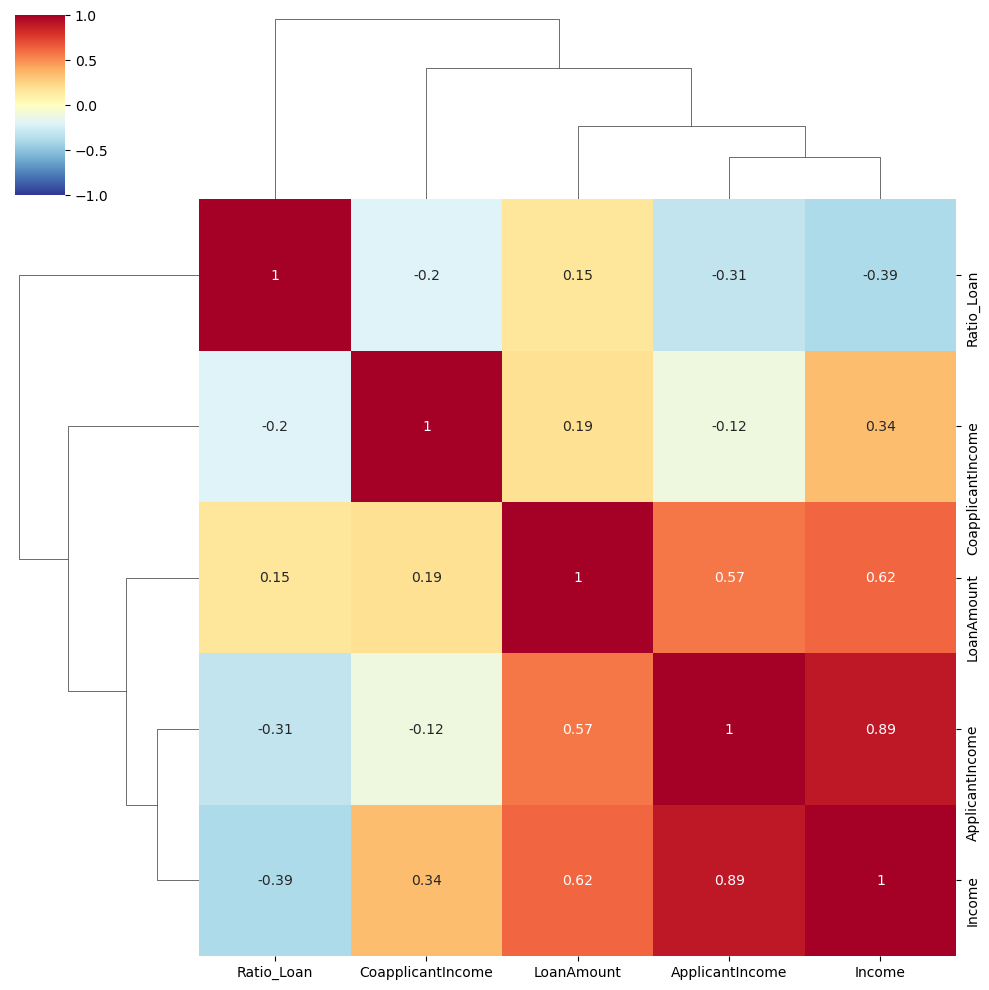

In [386]:
df = loan.corr()

sns.clustermap(df, 
               annot = True,      # display real value 
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 
               vmin = -1, vmax = 1, #colour chart -1 ~ 1 
              )

/var/folders/gs/qkvt6xzd2p17cfbwj2f8vs5h0000gn/T/ipykernel_4976/4014492485.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


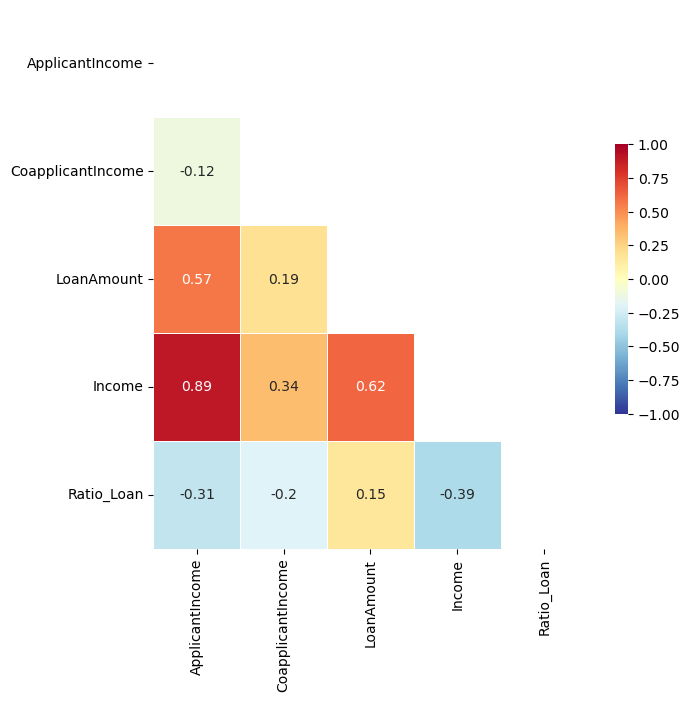

In [387]:

# define figure size
fig, ax = plt.subplots( figsize=(7,7) )

# create triangle shape (upper triangle : True, under triangle : False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# draw heatmap
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # display real value 
            mask=mask,      # define mask which is not displayed 
            linewidths=.5,  # edge line
            cbar_kws={"shrink": .5},# size of colourbar
            vmin = -1,vmax = 1   # range of colourbar -1 ~ 1
           )  
plt.show()

#### categorical vs categorical

In [388]:
# define function which calculate chi square statistics, p-value and freedom
def Chi(df, feature, target):
    crossTab = pd.crosstab(df[feature], df[target], margins=True)
    chi = chi2_contingency(observed=crossTab, correction=False)
    print("-----------", feature)
    print("1. chi square statistics:", chi[0])
    print("2. p-value:", chi[1])
    print("3. df:", chi[2]) 
    print(pd.DataFrame(chi[3]))

In [389]:
feature = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Amount_Term']
target = 'Loan_Status'
for f in feature:
    Chi(loan, f, target)
# Credit_History has the most strong correlation with target variable Loan_Status
# also Property_Area has quite strong  correlation with target variable Loan_Status

----------- Gender
1. chi square statistics: 0.19864165509874285
2. p-value: 0.9953824259938442
3. df: 4
            0           1      2
0   35.022801   76.977199  112.0
1  156.977199  345.022801  502.0
2  192.000000  422.000000  614.0
----------- Married
1. chi square statistics: 5.1380701449230175
2. p-value: 0.27342175083638093
3. df: 4
            0           1      2
0   66.605863  146.394137  213.0
1  125.394137  275.605863  401.0
2  192.000000  422.000000  614.0
----------- Dependents
1. chi square statistics: 3.151399001232423
2. p-value: 0.9245000626763191
3. df: 8
            0           1      2
0  112.573290  247.426710  360.0
1   31.895765   70.104235  102.0
2   31.583062   69.416938  101.0
3   15.947883   35.052117   51.0
4  192.000000  422.000000  614.0
----------- Education
1. chi square statistics: 4.5288927351787684
2. p-value: 0.3391352834234793
3. df: 4
           0          1      2
0  150.09772  329.90228  480.0
1   41.90228   92.09772  134.0
2  192.00000  422.00

#### visualisation about the correlation!

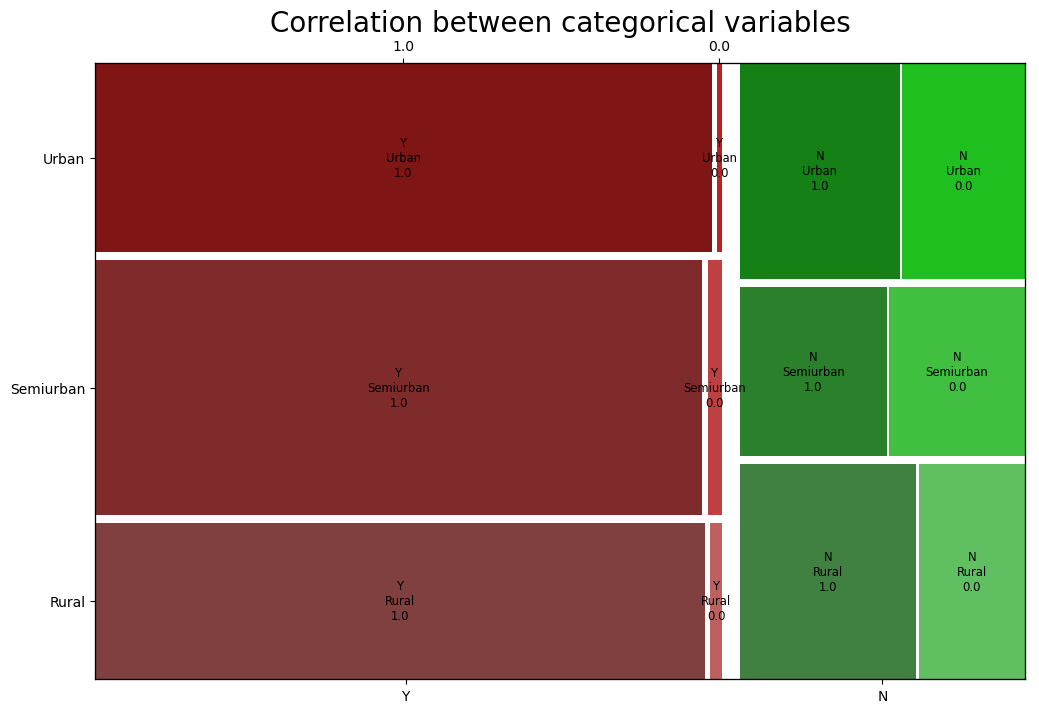

In [391]:
plt.rcParams['figure.figsize'] = [12, 8]
#idx = loan['Property_Area'].value_count().index()
#print(idx)
mosaic(loan.sort_values('Property_Area'), ['Loan_Status', 'Property_Area',
                                          'Credit_History'], 
       gap=0.02)
plt.title('Correlation between categorical variables', fontsize=20)

plt.show()

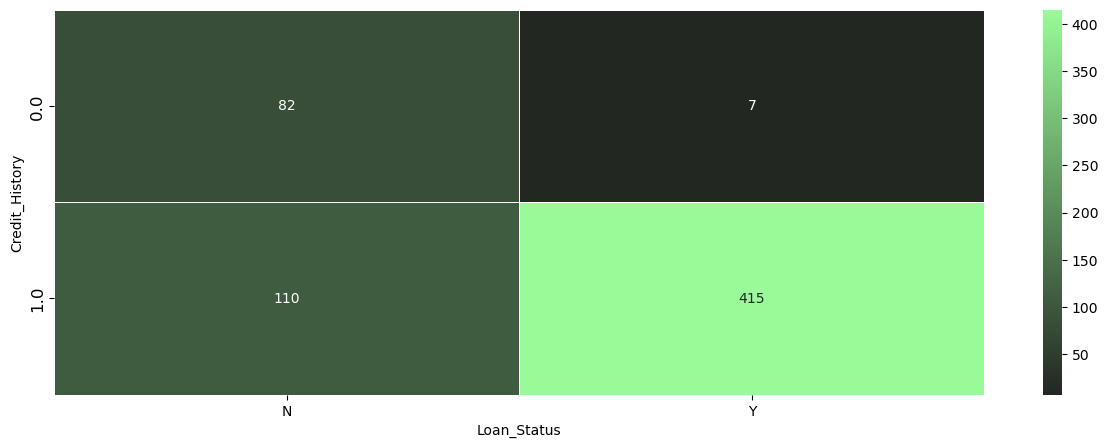

In [392]:
# draw heatmap (Credit_History)
cd_his = loan.groupby(['Credit_History','Loan_Status'])['Loan_ID'].count().unstack()
fig, ax = plt.subplots(figsize=(15,5))
pal = sns.dark_palette("palegreen", as_cmap=True) # color palette 
sns.heatmap(cd_his, 
            annot=True, # display number in each cell
            ax=ax, 
            linewidths=.5, # the width the division between cells
            fmt='.0f', # decimals
            cmap=pal) 
plt.ylabel('Credit_History')
plt.xlabel('Loan_Status')  
plt.yticks(fontsize=12)
plt.show()
# !!! strong correlation, in particular, Loan_Status = 'Y'

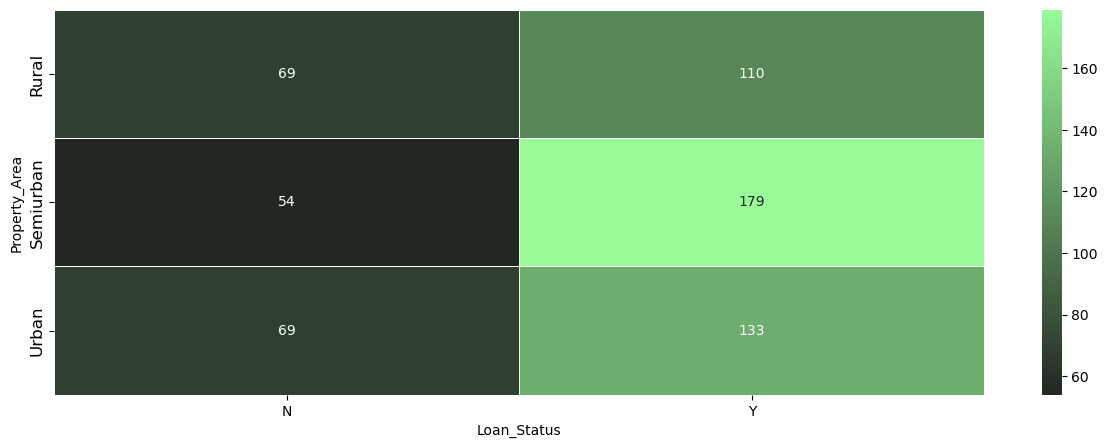

In [393]:
# draw heatmap (Property_Area)
pr_area = loan.groupby(['Property_Area','Loan_Status'])['Loan_ID'].count().unstack()
fig, ax = plt.subplots(figsize=(15,5))
pal = sns.dark_palette("palegreen", as_cmap=True) # color palette 
sns.heatmap(pr_area, 
            annot=True, # display number in each cell
            ax=ax, 
            linewidths=.5, # the width the division between cells
            fmt='.0f', # decimals
            cmap=pal) 
plt.ylabel('Property_Area')
plt.xlabel('Loan_Status')  
plt.yticks(fontsize=12)
plt.show()
# !!! in particulat, Semiurban has the strongest correlation with Loan_Status!!!

#### continuous vs categorical

In [394]:
# create derived variable trans_loan_Status
# This is for analysing continuous variable and categorical variable
loan['trans_loan_Status']=[1.0 for _ in range(len(loan))]
for i in range(len(loan)):
    if loan['Loan_Status'][i]=='Y':
        loan['trans_loan_Status'][i] = 1.0
    else:
        loan['trans_loan_Status'][i] = 0.0

/var/folders/gs/qkvt6xzd2p17cfbwj2f8vs5h0000gn/T/ipykernel_4976/111329524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['trans_loan_Status'][i] = 1.0
/var/folders/gs/qkvt6xzd2p17cfbwj2f8vs5h0000gn/T/ipykernel_4976/111329524.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['trans_loan_Status'][i] = 0.0


In [395]:
feature=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Income', 'Ratio_Loan']
stats.pointbiserialr(loan['trans_loan_Status'], loan['ApplicantIncome'])
for f in feature:
    print(f)
    print(stats.pointbiserialr(loan['trans_loan_Status'], loan[f]))
# the boxplot above, it's difficult to find out the correlation between
# Ratio_Loan and Loan_Status,
# but this time, there is a weak negative correlation !!!

ApplicantIncome
PointbiserialrResult(correlation=-0.00470952265935151, pvalue=0.9072878121306787)
CoapplicantIncome
PointbiserialrResult(correlation=-0.05918731348785013, pvalue=0.14294828684288485)
LoanAmount
PointbiserialrResult(correlation=-0.03641600997237057, pvalue=0.36768764508205704)
Income
PointbiserialrResult(correlation=-0.03127077887267467, pvalue=0.43924453392368584)
Ratio_Loan
PointbiserialrResult(correlation=-0.09163471695580966, pvalue=0.023160837531299577)


                   ApplicantIncome  CoapplicantIncome  LoanAmount    Income  \
ApplicantIncome           1.000000          -0.116605    0.565620  0.893037   
CoapplicantIncome        -0.116605           1.000000    0.187828  0.342781   
LoanAmount                0.565620           0.187828    1.000000  0.620102   
Income                    0.893037           0.342781    0.620102  1.000000   
Ratio_Loan               -0.312972          -0.199646    0.151715 -0.386484   
trans_loan_Status        -0.004710          -0.059187   -0.036416 -0.031271   

                   Ratio_Loan  trans_loan_Status  
ApplicantIncome     -0.312972          -0.004710  
CoapplicantIncome   -0.199646          -0.059187  
LoanAmount           0.151715          -0.036416  
Income              -0.386484          -0.031271  
Ratio_Loan           1.000000          -0.091635  
trans_loan_Status   -0.091635           1.000000  


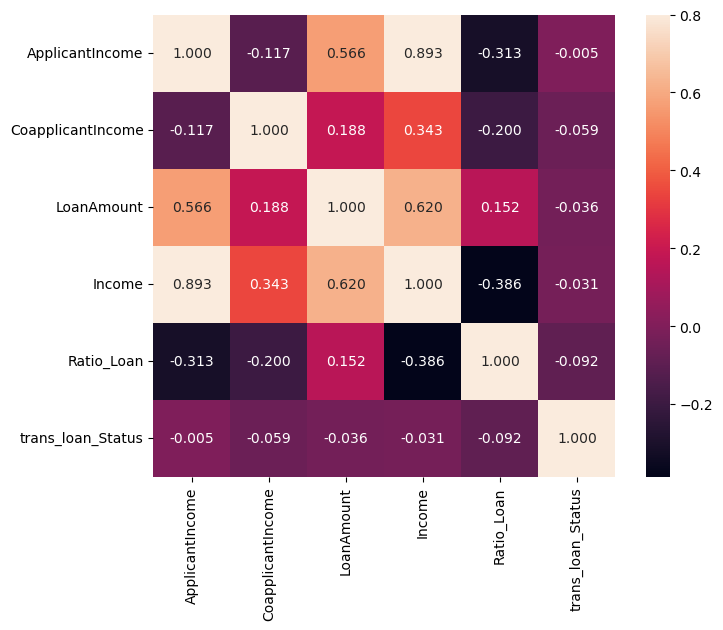

In [396]:
# heatmap including derived variables
  
draw_corrmat(loan)

# from visualisation, I can see the correlation as well


### Step3) Focus on Data where Property_Area = 'Semiurban'

In [397]:
p_area = loan.groupby(['Property_Area'])['Loan_ID'].count().to_frame()
p_area

,Loan_ID
Property_Area,
Rural,179
Semiurban,233
Urban,202


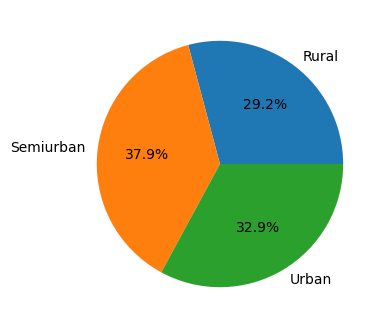

In [398]:
# Semiurban is the biggest proportion 
plt.rcParams['figure.figsize'] = [4, 4]
plt.pie(p_area['Loan_ID'], labels=['Rural','Semiurban','Urban'], autopct='%.1f%%')
plt.show()

In [399]:
Semiurban = loan[loan['Property_Area']=='Semiurban']

In [400]:
Semiurban.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income', 'Ratio_Loan', 'trans_loan_Status'],
      dtype='object')

In [401]:
# correlation analysis between categorical variables and target variable
# As expected, there is a strong correlation 
# between Credit_History and Loan_Status
feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
           'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'
for f in feature:
    Chi(Semiurban, f, target)

----------- Gender
1. chi square statistics: 0.00857097960544074
2. p-value: 0.9999908434814065
3. df: 4
           0           1      2
0  12.746781   42.253219   55.0
1  41.253219  136.746781  178.0
2  54.000000  179.000000  233.0
----------- Married
1. chi square statistics: 3.1864120446440527
2. p-value: 0.5271284269883121
3. df: 4
           0           1      2
0  18.540773   61.459227   80.0
1  35.459227  117.540773  153.0
2  54.000000  179.000000  233.0
----------- Dependents
1. chi square statistics: 4.868234049034246
2. p-value: 0.7715621921595492
3. df: 8
           0           1      2
0  31.519313  104.480687  136.0
1   9.270386   30.729614   40.0
2   8.575107   28.424893   37.0
3   4.635193   15.364807   20.0
4  54.000000  179.000000  233.0
----------- Education
1. chi square statistics: 0.01748895557565478
2. p-value: 0.9999619892096953
3. df: 4
           0           1      2
0  43.339056  143.660944  187.0
1  10.660944   35.339056   46.0
2  54.000000  179.000000  233.0

In [402]:
cd_his_ratio = Semiurban.groupby(['Credit_History', 'Loan_Status'])['Loan_ID'].count().to_frame()
cd_his_ratio

Loan_ID
Credit_History Loan_Status         
0.0            N                 26
               Y                  4
1.0            N                 28
               Y                175

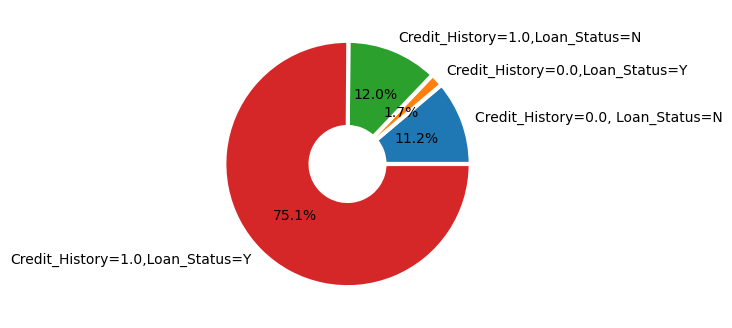

In [403]:
# if Credit_History='1.0' then more likely  Loan_Status = 'Y'
# if Credit_History='0.0' then more likely  Loan_Status = 'N'
# I assume that there is more variables to affect target variable Loan_Status
# because of 2 cases below
# Why Credit_History='1.0' and Loan_Status = 'N'
# Why Credit_History='0.0' and Loan_Status = 'Y'
plt.rcParams['figure.figsize'] = [4, 4]
label = ['Credit_History=0.0, Loan_Status=N','Credit_History=0.0,Loan_Status=Y','Credit_History=1.0,Loan_Status=N','Credit_History=1.0,Loan_Status=Y']
wedgeprops= {'width':0.7, 'edgecolor':'w', 'linewidth':3}
plt.pie(cd_his_ratio['Loan_ID'], labels=label, autopct='%.1f%%', wedgeprops=wedgeprops)
plt.show()
#plt.savefig('./semi_pro.png', bbox_inches = "tight" )

In [404]:
# to find out more variables which affect to a target variable Loan_Status
# correlation analysis between continuous variables and target variable
# As expected, there is a weak correlation 
# between Ratio_Loan and Loan_Status
feature=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Income', 'Ratio_Loan']
stats.pointbiserialr(Semiurban['trans_loan_Status'], Semiurban['ApplicantIncome'])
for f in feature:
    print(f)
    print(stats.pointbiserialr(Semiurban['trans_loan_Status'], Semiurban[f]))


ApplicantIncome
PointbiserialrResult(correlation=-0.0004785399999642087, pvalue=0.99420317103636)
CoapplicantIncome
PointbiserialrResult(correlation=-0.010539648112001851, pvalue=0.8728653523945542)
LoanAmount
PointbiserialrResult(correlation=-0.06058158274763084, pvalue=0.3572539273790854)
Income
PointbiserialrResult(correlation=-0.004763526345180472, pvalue=0.942346109748835)
Ratio_Loan
PointbiserialrResult(correlation=-0.10173158943947319, pvalue=0.1214937761312754)


In [405]:
# Why Credit_History='1.0' and Loan_Status = 'N'
# Why Credit_History='0.0' and Loan_Status = 'Y'
t1 = Semiurban[Semiurban['Credit_History']=='0.0'][Semiurban['Loan_Status']=='Y']
t2 = Semiurban[Semiurban['Credit_History']=='1.0'][Semiurban['Loan_Status']=='N']
t3 = pd.concat([t1,t2])


/var/folders/gs/qkvt6xzd2p17cfbwj2f8vs5h0000gn/T/ipykernel_4976/277286242.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t1 = Semiurban[Semiurban['Credit_History']=='0.0'][Semiurban['Loan_Status']=='Y']
/var/folders/gs/qkvt6xzd2p17cfbwj2f8vs5h0000gn/T/ipykernel_4976/277286242.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t2 = Semiurban[Semiurban['Credit_History']=='1.0'][Semiurban['Loan_Status']=='N']


In [406]:
# as a result, there is also correlation between Credit_History and Loan_Status
# so that I conclude that it's a negative correlation!
feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
           'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'
for f in feature:
    Chi(t3, f, target)
    

----------- Gender
1. chi square statistics: 0.026122448979591838
2. p-value: 0.9999154413112714
3. df: 4
        0      1     2
0   6.125  0.875   7.0
1  21.875  3.125  25.0
2  28.000  4.000  32.0
----------- Married
1. chi square statistics: 0.0
2. p-value: 1.0
3. df: 4
      0    1     2
0  14.0  2.0  16.0
1  14.0  2.0  16.0
2  28.0  4.0  32.0
----------- Dependents
1. chi square statistics: 2.2857142857142856
2. p-value: 0.970975941784256
3. df: 8
        0      1     2
0  13.125  1.875  15.0
1   8.750  1.250  10.0
2   2.625  0.375   3.0
3   3.500  0.500   4.0
4  28.000  4.000  32.0
----------- Education
1. chi square statistics: 0.026122448979591838
2. p-value: 0.9999154413112714
3. df: 4
        0      1     2
0  21.875  3.125  25.0
1   6.125  0.875   7.0
2  28.000  4.000  32.0
----------- Self_Employed
1. chi square statistics: 0.8465608465608465
2. p-value: 0.9320991752566593
3. df: 4
        0      1     2
0  23.625  3.375  27.0
1   4.375  0.625   5.0
2  28.000  4.000  32.0
--

In [407]:
# there is correlation between LoanAmount and target variable Loan_Status
# there is also a little bit less correlation 
# between Income and target variable Loan_Status compared to 
# between LoanAmount and target variable Loan_Status
feature = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Income', 'Ratio_Loan']
for f in feature:
    print(f)
    print(stats.pointbiserialr(t3['trans_loan_Status'], t3[f]))
    

ApplicantIncome
PointbiserialrResult(correlation=0.2683153713944835, pvalue=0.13759286015254343)
CoapplicantIncome
PointbiserialrResult(correlation=0.10548199545310474, pvalue=0.5655869136071204)
LoanAmount
PointbiserialrResult(correlation=0.33003726710040826, pvalue=0.06507141934083452)
Income
PointbiserialrResult(correlation=0.3022399062808973, pvalue=0.09270780111095854)
Ratio_Loan
PointbiserialrResult(correlation=-0.11077239672199307, pvalue=0.5461397439983762)


<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

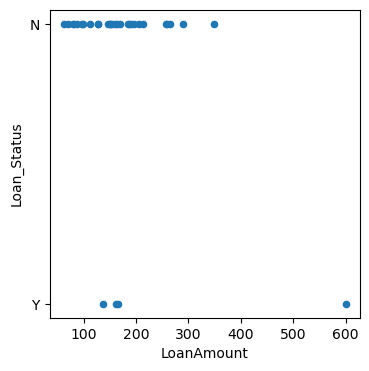

In [408]:
t3.plot(x='LoanAmount',y='Loan_Status',kind='scatter')

<AxesSubplot:xlabel='Income', ylabel='Loan_Status'>

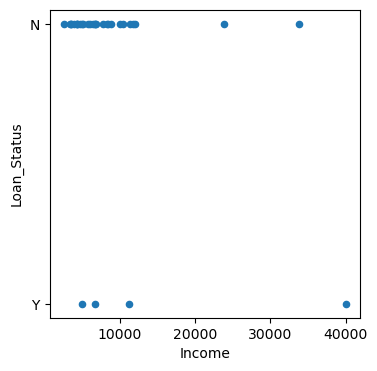

In [409]:
t3.plot(x='Income',y='Loan_Status',kind='scatter')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='[Credit_History, Loan_Status]'>

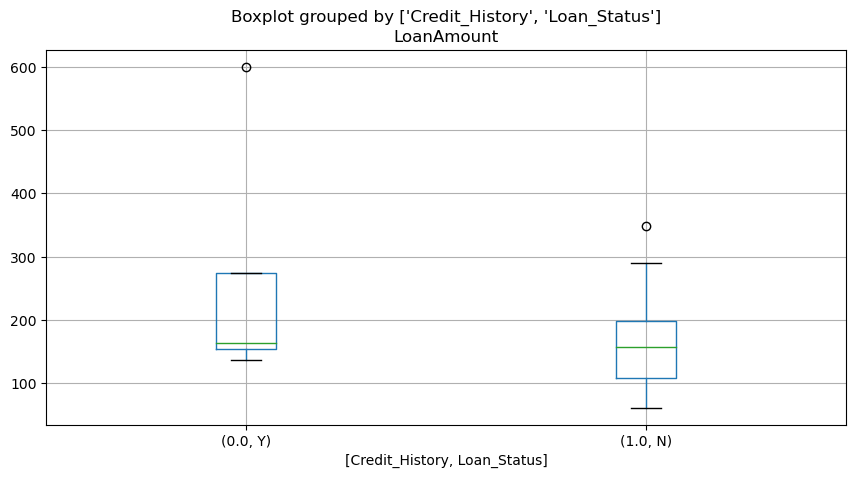

In [286]:
# let's see the distribution of LoanAmount in 2 cases below
# (such as Credit_History='0.0'& Loan_Status = 'Y' and 
# Credit_History='1.0'& Loan_Status = 'N')

t3.boxplot(column=['LoanAmount'], by=['Credit_History', 'Loan_Status'],figsize=(10,5))


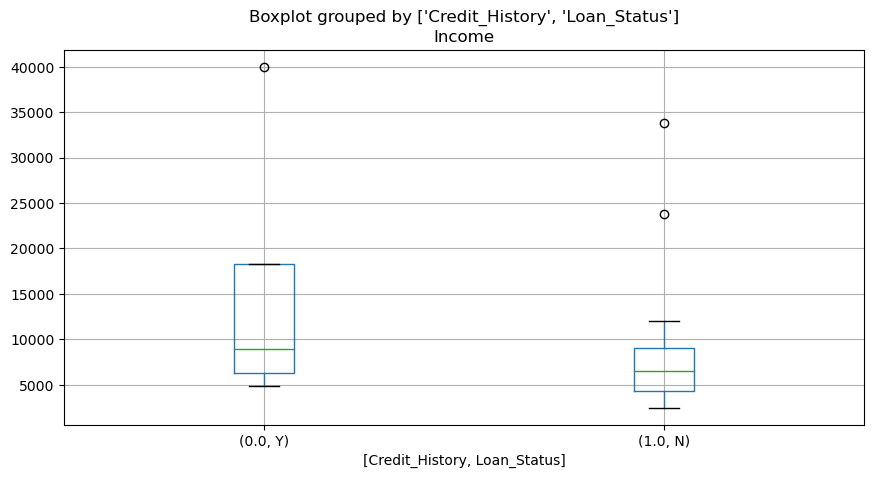

In [410]:
# let's see the distribution of Income in 2 cases below
# (such as Credit_History='0.0'& Loan_Status = 'Y' and 
# Credit_History='1.0'& Loan_Status = 'N')

t3.boxplot(column=['Income'], by=['Credit_History', 'Loan_Status'],figsize=(10,5));


In [411]:
# I make a base line of LoanAmount and Income
# which can classify Loan_Status = 'Y', even though Credit_History = '0.0' or
# Loan_Status = 'N', even though Credit_History = '1.0'

# the range of inner fence is decided to be base line of LoanAmount
# the range of inner fence is decided to be base line of Income
res1 = t3.groupby(['Credit_History', 'Loan_Status'])["LoanAmount"].quantile([0.25, 0.75])
#res = t3["LoanAmount"].groupby(t3['Credit_History'],t3['Loan_Status'])
step1 = (res1[1::2].to_numpy() - res1[::2].to_numpy())
upper_inner_fence_LA = step1*1.5 + res1[1::2].to_numpy()
lower_inner_fence_LA  = res1[::2].to_numpy() - step1*1.5

res2 = t3.groupby(['Credit_History', 'Loan_Status'])["Income"].quantile([0.25, 0.75])
#res = t3["LoanAmount"].groupby(t3['Credit_History'],t3['Loan_Status'])
print(res2[1::2].to_numpy())
print(res2[::2].to_numpy())
step2 = (res2[1::2].to_numpy() - res2[::2].to_numpy())
print(step2)
upper_inner_fence_I = step2*1.5 + res2[1::2].to_numpy()
lower_inner_fence_I = res2[::2].to_numpy() - step2*1.5

#upper_outer_fence = step*3 + res[0::1][1]
#lower_outer_fence  = res[0::1][0] - step*3
print(res1)
print(res2)
#print(res[0::1][0])
#print(res[0::1][1])
#print(res[0::1][2])
#print(res[0::1][3])
print(upper_inner_fence_LA)
print(lower_inner_fence_LA)
print(upper_inner_fence_I)
print(lower_inner_fence_I)
base_LoanAmount = upper_inner_fence_LA[0]
base_Income = upper_inner_fence_I[0]
print(base_LoanAmount)
print(base_Income)


[18337.5  9097. ]
[6267.  4315.5]
[12070.5  4781.5]
Credit_History  Loan_Status      
0.0             Y            0.25    155.00
                             0.75    274.50
1.0             N            0.25    108.75
                             0.75    198.25
Name: LoanAmount, dtype: float64
Credit_History  Loan_Status      
0.0             Y            0.25     6267.0
                             0.75    18337.5
1.0             N            0.25     4315.5
                             0.75     9097.0
Name: Income, dtype: float64
[453.75 332.5 ]
[-24.25 -25.5 ]
[36443.25 16269.25]
[-11838.75  -2856.75]
453.75
36443.25


In [412]:
# Credit_History='0.0' and Loan_Status='Y'
t1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Ratio_Loan,trans_loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,11117.0,0.012323,1.0
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,39999.0,0.015000,1.0
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y,4923.0,0.033719,1.0
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y,6715.0,0.023976,1.0


In [413]:
# Credit_History='0.0' and Loan_Status='Y' and LoanAmount > base_LoanAmount
t1[t1['LoanAmount']>base_LoanAmount]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Ratio_Loan,trans_loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,39999.0,0.015,1.0


In [414]:
# Credit_History='0.0' and Loan_Status='Y' and Income > base_Income
t1[t1['Income']>base_Income]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Ratio_Loan,trans_loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,39999.0,0.015,1.0


In [415]:
# Credit_History='1.0' and Loan_Status='N'
t2['Loan_ID'].count()


28

In [416]:
# Credit_History='1.0' and Loan_Status='N' and LoanAmount <= base_LoanAmount
# all rows match with base line
t2[t2['LoanAmount']<=base_LoanAmount]['Loan_ID'].count()

28

In [417]:
# Credit_History='1.0' and Loan_Status='N' and Income <= base_Income
# all rows match with base line
t2[t2['Income']<=base_Income]['Loan_ID'].count()

28

### Step4) apply identical logic to Propery_Area='Urban'

In [418]:
Urban = loan[loan['Property_Area']=='Urban']

In [419]:
# correlation analysis between categorical variables and target variable
# As expected, there is a strong correlation 
# between Credit_History and Loan_Status
feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
           'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'
for f in feature:
    Chi(Urban, f, target)

----------- Gender
1. chi square statistics: 1.1982658738511582
2. p-value: 0.8783840477304796
3. df: 4
           0           1      2
0  11.272277   21.727723   33.0
1  57.727723  111.272277  169.0
2  69.000000  133.000000  202.0
----------- Married
1. chi square statistics: 3.6040340829487607
2. p-value: 0.46223700958626235
3. df: 4
           0           1      2
0  23.910891   46.089109   70.0
1  45.089109   86.910891  132.0
2  69.000000  133.000000  202.0
----------- Dependents
1. chi square statistics: 1.7813184515724052
2. p-value: 0.9869976803489741
3. df: 8
           0           1      2
0  38.599010   74.400990  113.0
1  14.004950   26.995050   41.0
2  11.955446   23.044554   35.0
3   4.440594    8.559406   13.0
4  69.000000  133.000000  202.0
----------- Education
1. chi square statistics: 3.94741833112034
2. p-value: 0.413168774451652
3. df: 4
           0           1      2
0  55.336634  106.663366  162.0
1  13.663366   26.336634   40.0
2  69.000000  133.000000  202.0
--

In [420]:
# to find out more variables which affect to a target variable Loan_Status
# correlation analysis between continuous variables and target variable
# there is quite strong negative correlation between CoapplicantIncome and Loan_Status
# there is also negative correlation between Ratio_Loan and Loan_Status

feature=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Income', 'Ratio_Loan']
stats.pointbiserialr(Urban['trans_loan_Status'], Urban['ApplicantIncome'])
for f in feature:
    print(f)
    print(stats.pointbiserialr(Urban['trans_loan_Status'], Urban[f]))


ApplicantIncome
PointbiserialrResult(correlation=0.1001648942293905, pvalue=0.15608992628370952)
CoapplicantIncome
PointbiserialrResult(correlation=-0.14682549601357067, pvalue=0.037056037451022476)
LoanAmount
PointbiserialrResult(correlation=0.011460180013131704, pvalue=0.8714048607635184)
Income
PointbiserialrResult(correlation=0.003823431542008659, pvalue=0.9569318673974199)
Ratio_Loan
PointbiserialrResult(correlation=-0.134394094019716, pvalue=0.05653286938370909)


<AxesSubplot:title={'center':'CoapplicantIncome'}, xlabel='[Credit_History, Loan_Status]'>

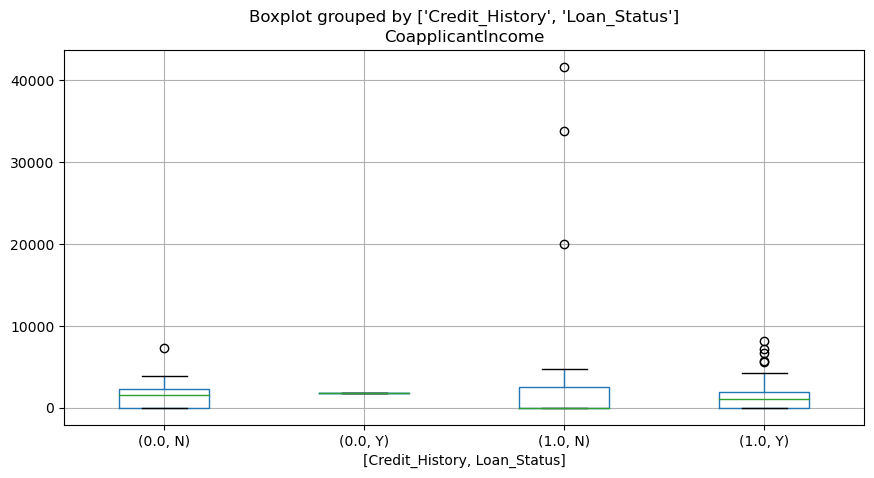

In [421]:
# As there is no corrlation above,
# I dicide to apply the negative correlations in Urban (Property_Area='Urban')
# At first, apply the correlation between CoapplicantIncome and Loan_Status
# draw boxplot for CoapplicantIncome

Urban.boxplot(column=['CoapplicantIncome'], by=['Credit_History', 'Loan_Status'],figsize=(10,5))

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

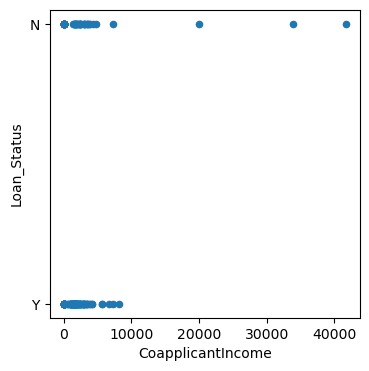

In [422]:
Urban.plot(x='CoapplicantIncome',y='Loan_Status',kind='scatter')

<AxesSubplot:xlabel='Ratio_Loan', ylabel='Loan_Status'>

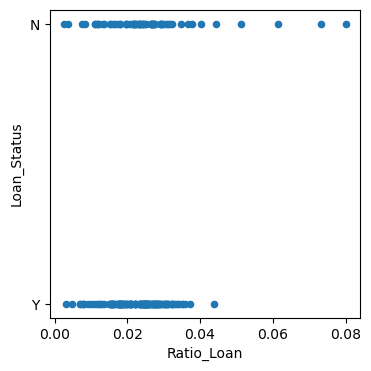

In [423]:
Urban.plot(x='Ratio_Loan',y='Loan_Status',kind='scatter')

In [424]:
# Why Credit_History='1.0' and Loan_Status = 'N'
# Why Credit_History='0.0' and Loan_Status = 'Y'
t1 = Urban[Urban['Credit_History']=='0.0'][Urban['Loan_Status']=='Y']
t2 = Urban[Urban['Credit_History']=='1.0'][Urban['Loan_Status']=='N']
t3 = pd.concat([t1,t2])


/var/folders/gs/qkvt6xzd2p17cfbwj2f8vs5h0000gn/T/ipykernel_4976/4264211063.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t1 = Urban[Urban['Credit_History']=='0.0'][Urban['Loan_Status']=='Y']
/var/folders/gs/qkvt6xzd2p17cfbwj2f8vs5h0000gn/T/ipykernel_4976/4264211063.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t2 = Urban[Urban['Credit_History']=='1.0'][Urban['Loan_Status']=='N']


In [425]:
# as a result, there is also correlation between Credit_History and Loan_Status
# so that I conclude that it's a negative correlation!
feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
           'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'
for f in feature:
    Chi(t3, f, target)
    

----------- Gender
1. chi square statistics: 0.1809954751131222
2. p-value: 0.996143948151766
3. df: 4
       0     1     2
0   5.85  0.15   6.0
1  33.15  0.85  34.0
2  39.00  1.00  40.0
----------- Married
1. chi square statistics: 0.839160839160839
2. p-value: 0.9331222378515776
3. df: 4
       0     1     2
0  17.55  0.45  18.0
1  21.45  0.55  22.0
2  39.00  1.00  40.0
----------- Dependents
1. chi square statistics: 9.23076923076923
2. p-value: 0.32320426533181
3. df: 8
        0      1     2
0  22.425  0.575  23.0
1   6.825  0.175   7.0
2   5.850  0.150   6.0
3   3.900  0.100   4.0
4  39.000  1.000  40.0
----------- Education
1. chi square statistics: 0.21756021756021754
2. p-value: 0.9944955066490242
3. df: 4
        0      1     2
0  32.175  0.825  33.0
1   6.825  0.175   7.0
2  39.000  1.000  40.0
----------- Self_Employed
1. chi square statistics: 0.14652014652014653
2. p-value: 0.997444012684454
3. df: 4
        0      1     2
0  34.125  0.875  35.0
1   4.875  0.125   5.0
2  

In [426]:
# to find out more variables which affect to a target variable Loan_Status
# correlation analysis between continuous variables and target variable
# there is no correlation in t3 which satisfy 2 cases below
# Credit_History='1.0' and Loan_Status = 'N'
# Credit_History='0.0' and Loan_Status = 'Y'
feature=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Income', 'Ratio_Loan']
stats.pointbiserialr(t3['trans_loan_Status'], t3['ApplicantIncome'])
for f in feature:
    print(f)
    print(stats.pointbiserialr(t3['trans_loan_Status'], t3[f]))


ApplicantIncome
PointbiserialrResult(correlation=0.003957363714704256, pvalue=0.9806651792889622)
CoapplicantIncome
PointbiserialrResult(correlation=-0.027930935103526594, pvalue=0.8641589786159707)
LoanAmount
PointbiserialrResult(correlation=0.023544921803584182, pvalue=0.885335394596254)
Income
PointbiserialrResult(correlation=-0.027777455661358766, pvalue=0.8648985119096095)
Ratio_Loan
PointbiserialrResult(correlation=-0.0039868882706263695, pvalue=0.9805209561240702)


<AxesSubplot:title={'center':'CoapplicantIncome'}, xlabel='[Credit_History, Loan_Status]'>

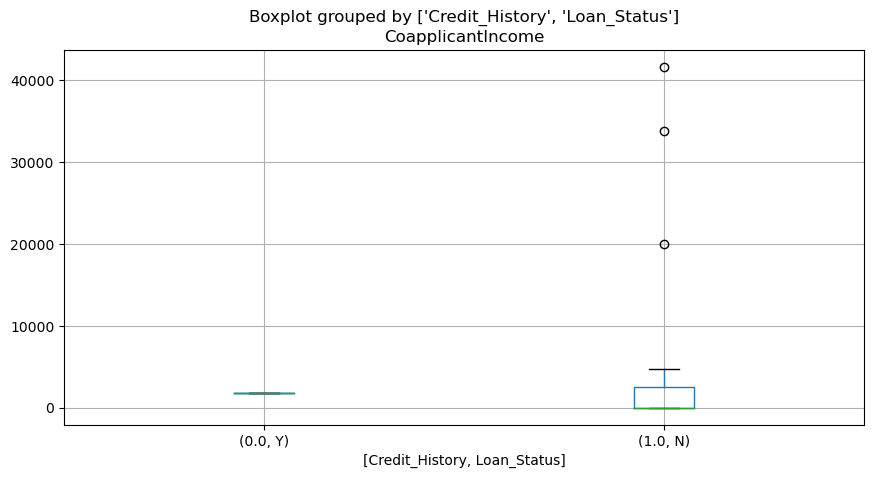

In [427]:
# As there is no corrlation above,
# I dicide to apply the negative correlations in Urban (Property_Area='Urban')
# At first, apply the correlation between CoapplicantIncome and Loan_Status
# draw boxplot for CoapplicantIncome

t3.boxplot(column=['CoapplicantIncome'], by=['Credit_History', 'Loan_Status'],figsize=(10,5))

<AxesSubplot:title={'center':'Ratio_Loan'}, xlabel='[Credit_History, Loan_Status]'>

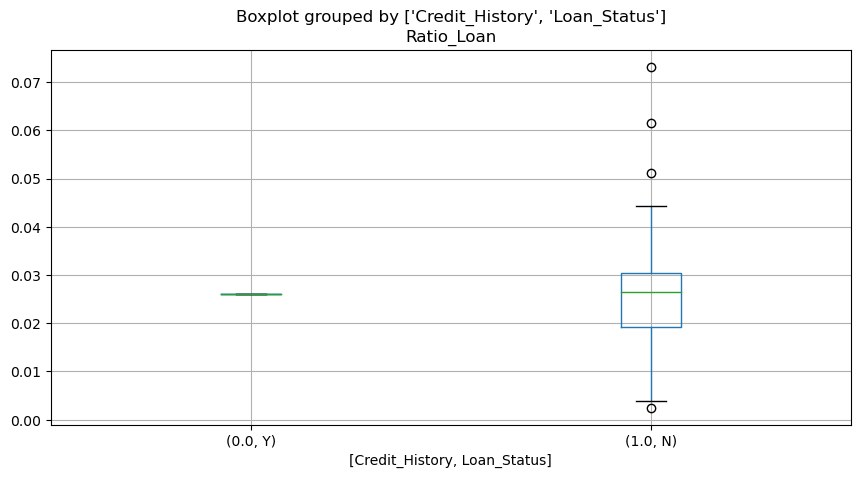

In [428]:
# As there is no corrlation above,
# I dicide to apply the negative correlations in Urban (Property_Area='Urban')
# Secondly, apply the negative correlation between Ratio_Loan and Loan_Status
# draw boxplot for Ratio_Loan

t3.boxplot(column=['Ratio_Loan'], by=['Credit_History', 'Loan_Status'],figsize=(10,5))

In [429]:
# I make a base line of CoapplicantIncome and Ratio_Loan
# which can classify Loan_Status = 'N', even though Credit_History = '1.0'
# In Urban data, Loan_Status = 'Y' and Credit_History = '0.0' is excluded in this logic,
# as there is a negative correlation


# the range of inner fence is decided to be base line of CoapplicantIncome
# the range of inner fence is decided to be base line of Ratio_Loan
res1 = t3.groupby(['Credit_History', 'Loan_Status'])["CoapplicantIncome"].quantile([0.25, 0.75])

print(res1[0::1][2])

print(res1[0::1][3])
step1 = (res1[0::1][3] - res1[0::1][2])
upper_inner_fence_CI = step1*1.5 + res1[0::1][3]
lower_inner_fence_CI  = res1[0::1][2] - step1*1.5

res2 = t3.groupby(['Credit_History', 'Loan_Status'])["Ratio_Loan"].quantile([0.25, 0.75])
#res = t3["LoanAmount"].groupby(t3['Credit_History'],t3['Loan_Status'])
print(res2[1::2].to_numpy())
print(res2[::2].to_numpy())
step2 = (res2[0::1][3] - res2[0::1][2])
print(step2)
upper_inner_fence_RL = step2*1.5 + res2[0::1][3]
lower_inner_fence_RL = res2[0::1][2] - step2*1.5

#upper_outer_fence = step*3 + res[0::1][1]
#lower_outer_fence  = res[0::1][0] - step*3
print(res1)
print(res2)
#print(res[0::1][0])
#print(res[0::1][1])
#print(res[0::1][2])
#print(res[0::1][3])
print(upper_inner_fence_LA)
print(lower_inner_fence_LA)
print(upper_inner_fence_I)
print(lower_inner_fence_I)
base_CI = upper_inner_fence_CI
base_RL = upper_inner_fence_RL

print(base_CI)
print(base_RL)


0.0
2510.0
[0.02604167 0.03046708]
[0.02604167 0.01930532]
0.011161755215433194
Credit_History  Loan_Status      
0.0             Y            0.25    1811.0
                             0.75    1811.0
1.0             N            0.25       0.0
                             0.75    2510.0
Name: CoapplicantIncome, dtype: float64
Credit_History  Loan_Status      
0.0             Y            0.25    0.026042
                             0.75    0.026042
1.0             N            0.25    0.019305
                             0.75    0.030467
Name: Ratio_Loan, dtype: float64
[453.75 332.5 ]
[-24.25 -25.5 ]
[36443.25 16269.25]
[-11838.75  -2856.75]
6275.0
0.047209710167434527


In [430]:
# Credit_History='1.0' and Loan_Status='N'
t2['Loan_ID'].count()

39

In [431]:
# Credit_History='1.0' and Loan_Status='N' and CoapplicantIncome <= base_CI
# all rows match with base line
t2[t2['CoapplicantIncome']<=base_CI]['Loan_ID'].count()

36

In [432]:
# Credit_History='1.0' and Loan_Status='N' and Ratio_Loan <= base_RL
# all rows match with base line
t2[t2['Ratio_Loan']<=base_RL]['Loan_ID'].count()

36

### Step5) apply identical logic to Propery_Area='Rural'

In [433]:
Rural = loan[loan['Property_Area']=='Rural']

In [434]:
# correlation analysis between categorical variables and target variable
# As expected, there is a strong correlation 
# between Credit_History and Loan_Status
feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
           'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'
for f in feature:
    Chi(Rural, f, target)

----------- Gender
1. chi square statistics: 0.1138355504554663
2. p-value: 0.9984403554439335
3. df: 4
           0           1      2
0   9.251397   14.748603   24.0
1  59.748603   95.251397  155.0
2  69.000000  110.000000  179.0
----------- Married
1. chi square statistics: 0.05287284207823941
2. p-value: 0.9996566558615058
3. df: 4
           0           1      2
0  24.284916   38.715084   63.0
1  44.715084   71.284916  116.0
2  69.000000  110.000000  179.0
----------- Dependents
1. chi square statistics: 4.172650616503688
2. p-value: 0.8412199090401062
3. df: 8
           0           1      2
0  42.787709   68.212291  111.0
1   8.094972   12.905028   21.0
2  11.178771   17.821229   29.0
3   6.938547   11.061453   18.0
4  69.000000  110.000000  179.0
----------- Education
1. chi square statistics: 1.4697632649092987
2. p-value: 0.8319836874759583
3. df: 4
           0           1      2
0  50.497207   80.502793  131.0
1  18.502793   29.497207   48.0
2  69.000000  110.000000  179.0


In [435]:
# to find out more variables which affect to a target variable Loan_Status
# correlation analysis between continuous variables and target variable
# there is no correlation

feature=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Income', 'Ratio_Loan']
stats.pointbiserialr(Rural['trans_loan_Status'], Rural['ApplicantIncome'])
for f in feature:
    print(f)
    print(stats.pointbiserialr(Rural['trans_loan_Status'], Rural[f]))


ApplicantIncome
PointbiserialrResult(correlation=-0.11047349514459931, pvalue=0.1409696230775481)
CoapplicantIncome
PointbiserialrResult(correlation=0.0930017511886525, pvalue=0.21562448503395504)
LoanAmount
PointbiserialrResult(correlation=-0.06184764901544526, pvalue=0.41081750843118375)
Income
PointbiserialrResult(correlation=-0.08571975833408735, pvalue=0.25390366635229217)
Ratio_Loan
PointbiserialrResult(correlation=-0.044735561109022895, pvalue=0.5520936891438889)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

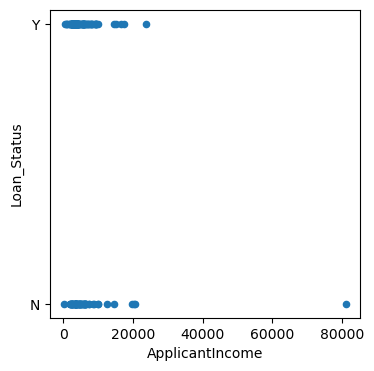

In [436]:
Rural.plot(x='ApplicantIncome',y='Loan_Status',kind='scatter')

In [437]:
# Why Credit_History='1.0' and Loan_Status = 'N'
# Why Credit_History='0.0' and Loan_Status = 'Y'
t1 = Rural[Rural['Credit_History']=='0.0'][Rural['Loan_Status']=='Y']
t2 = Rural[Rural['Credit_History']=='1.0'][Rural['Loan_Status']=='N']
t3 = pd.concat([t1,t2])


/var/folders/gs/qkvt6xzd2p17cfbwj2f8vs5h0000gn/T/ipykernel_4976/1421237615.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t1 = Rural[Rural['Credit_History']=='0.0'][Rural['Loan_Status']=='Y']
/var/folders/gs/qkvt6xzd2p17cfbwj2f8vs5h0000gn/T/ipykernel_4976/1421237615.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t2 = Rural[Rural['Credit_History']=='1.0'][Rural['Loan_Status']=='N']


In [438]:
# as a result, there is also correlation between Credit_History and Loan_Status
# so that I conclude that it's a negative correlation!
feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
           'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'
for f in feature:
    Chi(t3, f, target)
    

----------- Gender
1. chi square statistics: 0.5232558139534884
2. p-value: 0.9711978909707532
3. df: 4
      0    1     2
0   8.6  0.4   9.0
1  34.4  1.6  36.0
2  43.0  2.0  45.0
----------- Married
1. chi square statistics: 0.05190189247716783
2. p-value: 0.9996690434615869
3. df: 4
           0         1     2
0  18.155556  0.844444  19.0
1  24.844444  1.155556  26.0
2  43.000000  2.000000  45.0
----------- Dependents
1. chi square statistics: 0.9452363090772693
2. p-value: 0.9985712547919157
3. df: 8
           0         1     2
0  29.622222  1.377778  31.0
1   6.688889  0.311111   7.0
2   3.822222  0.177778   4.0
3   2.866667  0.133333   3.0
4  43.000000  2.000000  45.0
----------- Education
1. chi square statistics: 0.9452363090772694
2. p-value: 0.917983116226526
3. df: 4
           0         1     2
0  29.622222  1.377778  31.0
1  13.377778  0.622222  14.0
2  43.000000  2.000000  45.0
----------- Self_Employed
1. chi square statistics: 0.2041973908111174
2. p-value: 0.995129471

In [439]:
# to find out more variables which affect to a target variable Loan_Status
# correlation analysis between continuous variables and target variable
# there is no correlation in t3 which satisfy 2 cases below
# Credit_History='1.0' and Loan_Status = 'N'
# Credit_History='0.0' and Loan_Status = 'Y'
feature=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Income', 'Ratio_Loan']
stats.pointbiserialr(t3['trans_loan_Status'], t3['ApplicantIncome'])
for f in feature:
    print(f)
    print(stats.pointbiserialr(t3['trans_loan_Status'], t3[f]))


ApplicantIncome
PointbiserialrResult(correlation=-0.0995344730319027, pvalue=0.5153519454597307)
CoapplicantIncome
PointbiserialrResult(correlation=-0.021302347949920336, pvalue=0.8895331916234179)
LoanAmount
PointbiserialrResult(correlation=-0.10543655411906294, pvalue=0.4906270896065033)
Income
PointbiserialrResult(correlation=-0.09836684195422216, pvalue=0.5203161914796749)
Ratio_Loan
PointbiserialrResult(correlation=-0.05172929616150381, pvalue=0.735761268225788)


<AxesSubplot:title={'center':'LoanAmount'}, xlabel='[Credit_History, Loan_Status]'>

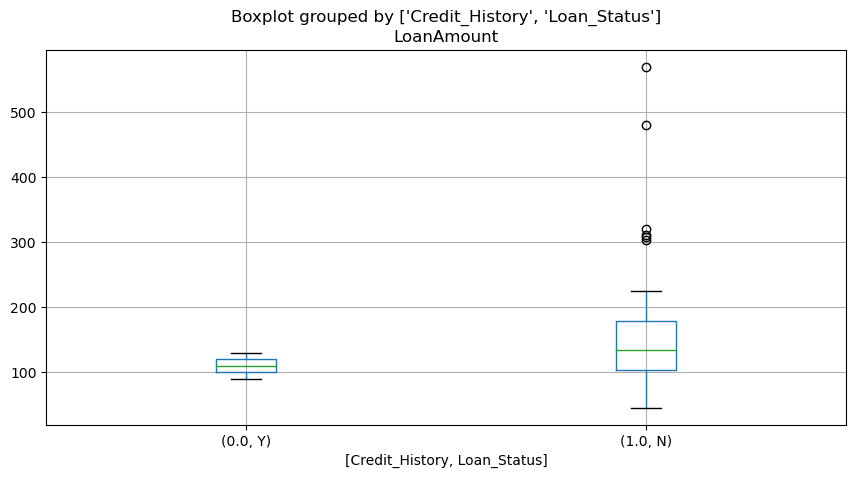

In [440]:
# As there is no prticular correlation,
# analyse variable LoanAmount which has the biggest coefficient and
# the smallest p-value
# draw boxplots for LoanAmount
t3.boxplot(column=['LoanAmount'], by=['Credit_History', 'Loan_Status'],figsize=(10,5))

In [441]:
# I make a base line of ApplicantIncome 
# which can classify Loan_Status = 'N', even though Credit_History = '1.0'
# and Loan_Status = 'Y', even though Credit_History = '0.0'


# the range of inner fence is decided to be base line of ApplicantIncome
res1 = t3.groupby(['Credit_History', 'Loan_Status'])["LoanAmount"].quantile([0.25, 0.75])

step1 = (res1[1::2].to_numpy() - res1[::2].to_numpy())
upper_inner_fence_AI = step1*1.5 + res1[1::2].to_numpy()
lower_inner_fence_AI  = res1[::2].to_numpy() - step1*1.5

#step1 = (res1[0::1][3] - res1[0::1][2])
#upper_inner_fence_AI = step1*1.5 + res1[0::1][3]
#lower_inner_fence_AI  = res1[0::1][2] - step1*1.5


print(res1)

print(upper_inner_fence_AI)
print(lower_inner_fence_AI)

base_AI = upper_inner_fence_AI[1]

print(base_AI)



Credit_History  Loan_Status      
0.0             Y            0.25    100.0
                             0.75    120.0
1.0             N            0.25    103.0
                             0.75    178.5
Name: LoanAmount, dtype: float64
[150.   291.75]
[ 70.   -10.25]
291.75


<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

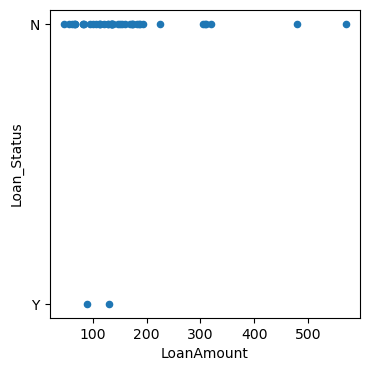

In [442]:
t3.plot(x='LoanAmount',y='Loan_Status',kind='scatter')

In [443]:
# Credit_History='1.0' and Loan_Status='N'
t2['Loan_ID'].count()

43

In [444]:
# Credit_History='1.0' and Loan_Status='N' and ApplicantIncome <= base_AI
# all rows match with base line
t2[t2['LoanAmount']<=base_AI]['Loan_ID'].count()

37

### Step6) Conclusion
#### In all 3sets of data, there is strong correlation between Credit_History and Loan_Status. Interestingly, there is a little different characteristic according to Propery_Area. In Semiurban data, LoanAmount and Income have a storing correlation with Loan_Status. In Urban data, there is a negative correlation between CoapplicantIncome and Loan_Status, as well as Ratio_Loan and Loan_Status. Lastly, in Rural data, there is no correlation with LoanStatus except Credit_History.
#### In conclusion, we have to train data separately according to Property_Area to improve the accuracy of modelling.

### Annex

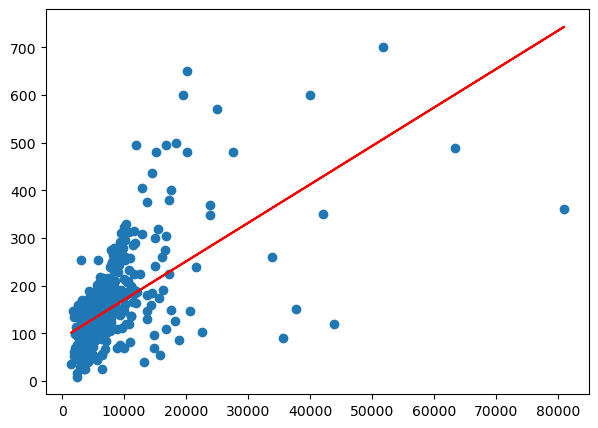

In [445]:
# let's analyse LoanAmount vs Income
# Assume that we have to predict LoanAmount depending Income
# Do polyfit
# if ouliers are removed, better fitting data??
plt.rcParams['figure.figsize'] = [7, 5]
[m, b] = np.polyfit(loan['Income'], loan['LoanAmount'], 1)
plt.scatter(loan['Income'], loan['LoanAmount'])
plt.plot(loan['Income'], m*loan['Income']+b, 'r');

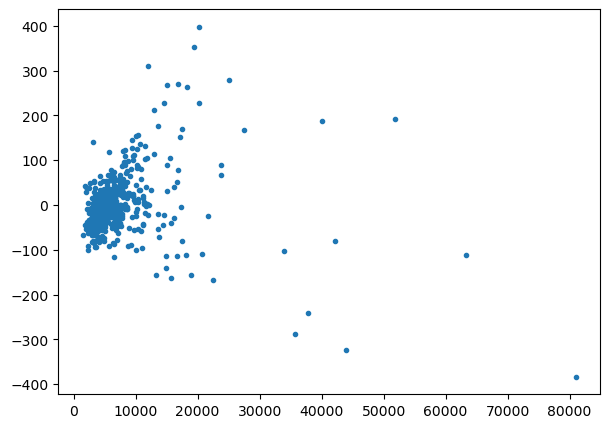

In [446]:
res1 = loan['LoanAmount'] - (m*loan['Income']+b)
plt.plot(loan['Income'], res1, '.')

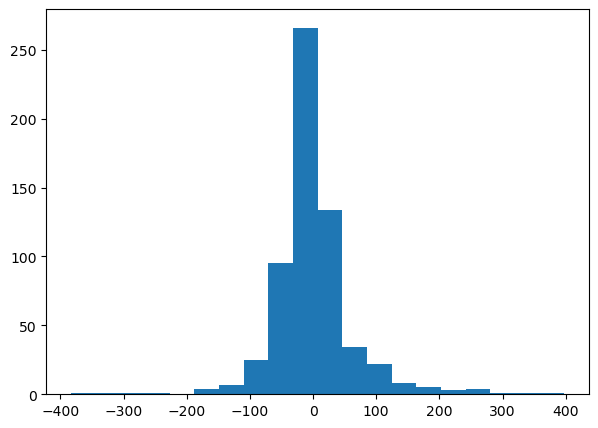

In [447]:
# residuals are normal distribution
# this means LoanAmount can be pridicted quite exactly from LoanAmount
plt.hist(res1, bins=20);

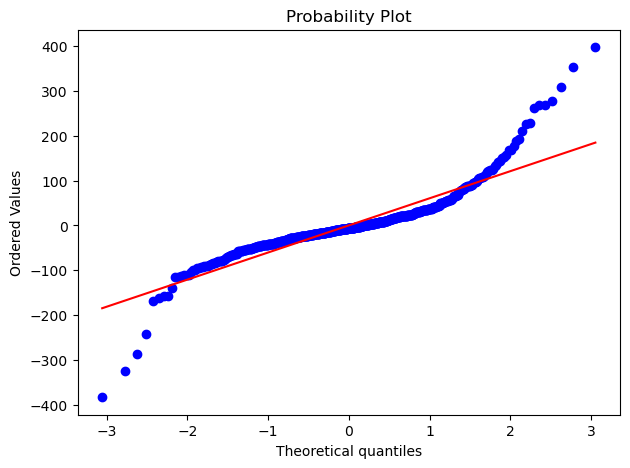

In [448]:
stats.probplot(res1, plot=plt);

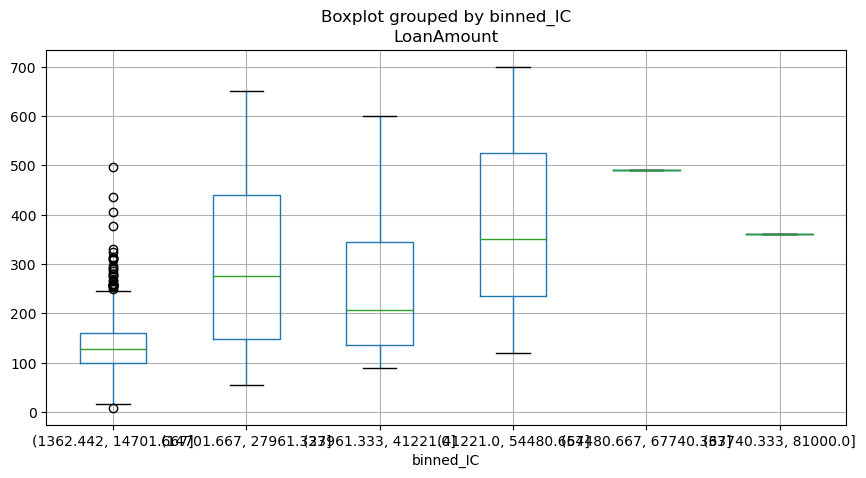

In [449]:
# Let's remove ouliers
## first bin the Income into 6 equally spaced bins and then plot LoanAmount
loan['binned_IC'] = pd.cut(loan['Income'],bins=6)
loan.boxplot(column=['LoanAmount'], by='binned_IC',figsize=(10,5));

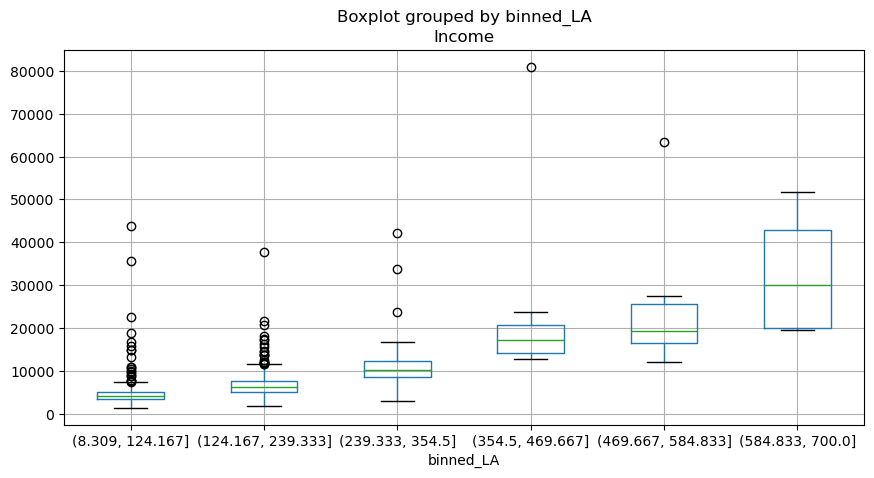

In [450]:
# Let's remove ouliers
## first bin the Income into 6 equally spaced bins and then plot LoanAmount
loan['binned_LA'] = pd.cut(loan['LoanAmount'],bins=6)
loan.boxplot(column=['Income'], by='binned_LA',figsize=(10,5));

In [451]:
res2 = loan.groupby("binned_LA")["Income"].quantile([0.25, 0.75])
res2

binned_LA               
(8.309, 124.167]    0.25     3510.0
                    0.75     5093.0
(124.167, 239.333]  0.25     5176.0
                    0.75     7745.0
(239.333, 354.5]    0.25     8566.0
                    0.75    12333.5
(354.5, 469.667]    0.25    14116.0
                    0.75    20651.5
(469.667, 584.833]  0.25    16390.5
                    0.75    25622.0
(584.833, 700.0]    0.25    19995.5
                    0.75    42940.0
Name: Income, dtype: float64

In [452]:
# Use the formula and the computation you did above to find the fences
step = (res2[1::2].to_numpy() - res2[::2].to_numpy())
upper_inner_fence = step*1.5 + res2[1::2].to_numpy() 
lower_inner_fence  = res2[0::2].to_numpy()  - step*1.5
upper_outer_fence = step*3 + res2[1::2].to_numpy() 
lower_outer_fence  = res2[0::2].to_numpy()  - step*3
print(upper_inner_fence)
print(lower_inner_fence)
print(upper_outer_fence)
print(lower_outer_fence)

[ 7467.5  11598.5  17984.75 30454.75 39469.25 77356.75]
[  1135.5    1322.5    2914.75   4312.75   2543.25 -14421.25]
[  9842.   15452.   23636.   40258.   53316.5 111773.5]
[ -1239.   -2531.   -2736.5  -5490.5 -11304.  -48838. ]


In [453]:
bin1 = loan[(loan['LoanAmount']> 8.309) & (loan['LoanAmount']<= 124.167)]
bin2 = loan[(loan['LoanAmount']> 124.167) & (loan['LoanAmount']<= 239.333)]
bin3 = loan[(loan['LoanAmount']> 239.333) & (loan['LoanAmount']<= 354.5)]
bin4 = loan[(loan['LoanAmount']> 354.5) & (loan['LoanAmount']<= 469.667)]
bin5 = loan[(loan['LoanAmount']> 469.667) & (loan['LoanAmount']<= 584.833)]
bin6 = loan[(loan['LoanAmount']> 584.833) & (loan['LoanAmount']<= 700.0)]


In [454]:
bin1['Loan_ID'].count()

281

In [455]:
lower_outer_fence[0]

-1239.0

In [456]:
bin1 = bin1[(bin1['Income']>= lower_outer_fence[0]) & (bin1['Income']<= upper_outer_fence[0])]
bin2 = bin2[(bin2['Income']>= lower_outer_fence[1]) & (bin2['Income']<= upper_outer_fence[1])]
bin3 = bin3[(bin3['Income']>= lower_outer_fence[2]) & (bin3['Income']<= upper_outer_fence[2])]
bin4 = bin4[(bin4['Income']>= lower_outer_fence[3]) & (bin4['Income']<= upper_outer_fence[3])]
bin5 = bin5[(bin5['Income']>= lower_outer_fence[4]) & (bin5['Income']<= upper_outer_fence[4])]
bin6 = bin6[(bin6['Income']>= lower_outer_fence[5]) & (bin6['Income']<= upper_outer_fence[5])]

In [457]:
bin_list = [bin1, bin2, bin3, bin4, bin5, bin6]
bin_all = pd.concat(bin_list, ignore_index=True)
bin_all['Loan_ID'].count()

588

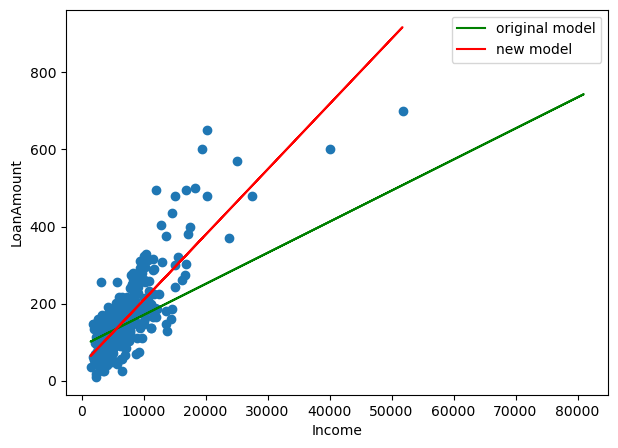

In [458]:
# after removing outliers, much more fitting data
# if we predict LoanAmount, we need to remove ouliers for Income
plt.rcParams['figure.figsize'] = [7, 5]
[m1, b1] = np.polyfit(bin_all['Income'], bin_all['LoanAmount'], 1)
plt.scatter(bin_all['Income'], bin_all['LoanAmount'])
plt.plot(loan['Income'], m*loan['Income']+b, 'g', label='original model');
plt.plot(bin_all['Income'], m1*bin_all['Income']+b1, 'r', label='new model');
plt.legend()
plt.xlabel('Income')
plt.ylabel('LoanAmount')
plt.show()

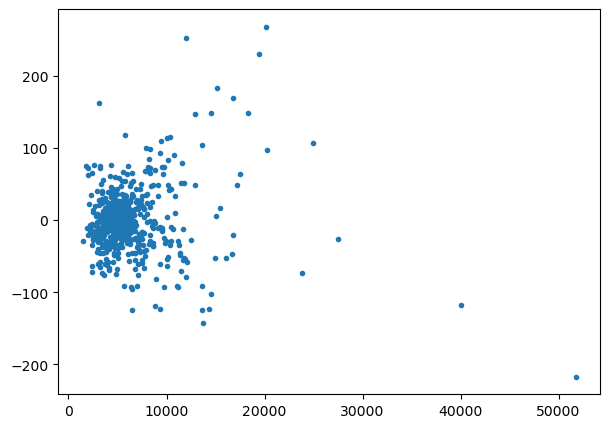

In [459]:
res3 = bin_all['LoanAmount'] - (m1*bin_all['Income']+b1)
plt.plot(bin_all['Income'], res3, '.')

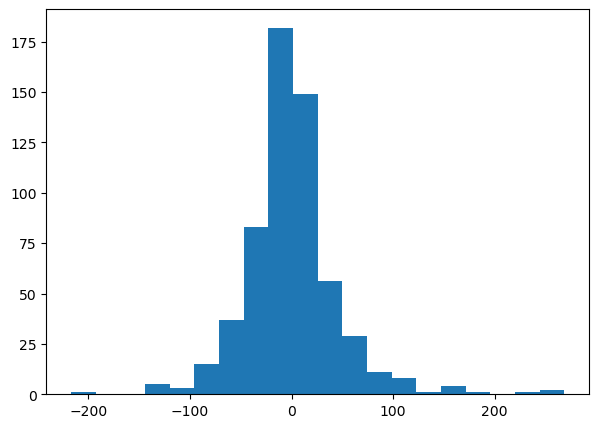

In [460]:
# residuals are normal distribution
# this means LoanAmount can be pridicted quite exactly from LoanAmount
plt.hist(res3, bins=20);

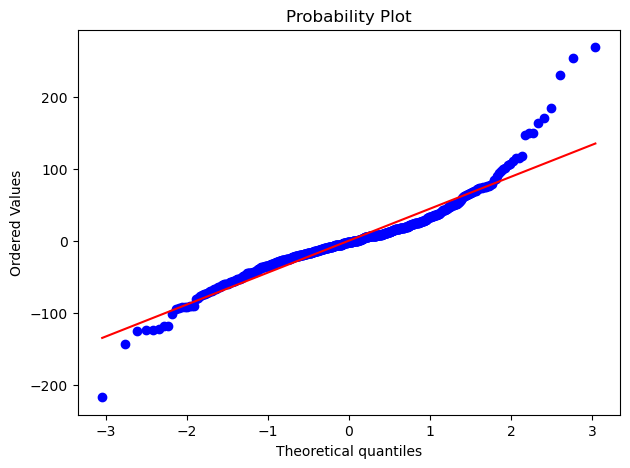

In [461]:
stats.probplot(res3, plot=plt);

In [463]:
loan.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term       object
Credit_History         object
Property_Area          object
Loan_Status            object
Income                float64
Ratio_Loan            float64
trans_loan_Status     float64
binned_IC            category
binned_LA            category
dtype: object